### Half-Spin

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.transforms as transforms

In [2]:
N = 2
tmin = 0
tmax = 10
psi0 = basis(N, 0)                  # Spin up
psi1 = basis(N, 1)                  # Spin down
psi2 = psi0 + psi1
psi2 = psi2.unit()  
psi3=psi0-psi1 
psi3=psi3.unit()                 #superposition of |0>-|1>
psi4=-psi0+psi1
psi4=psi4.unit()                 #superposition of -|0>+|1>
psi5=-psi0-psi1
psi5=psi5.unit()                 #superposition of -|0>-|1>

####  Only Dephasing

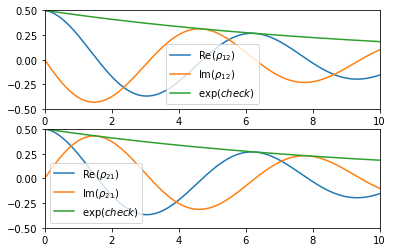

In [3]:
wl = 1                           # Angular frequency
delta_w = 0.05                  # Uncertainty
H =0.5* wl * sigmaz()            # Hamiltonion magnetic field in the z direction
C_ops = [np.sqrt(delta_w)*sigmaz()]      # Collapse Operator
times = np.linspace(tmin,tmax,400)    # Time of measurement
result = mesolve(H, psi2, times, C_ops)
plt.figure()
plt.subplot(211)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)

plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{12}$)');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{12}$)' );
plt.plot(times,0.5*np.exp(-2*delta_w*times), label=r'exp($check$)');
plt.legend()
plt.subplot(212)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{21}$)');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{21}$)');
plt.plot(times,0.5*np.exp(-2*delta_w*times), label=r'exp($check$)');
plt.legend()

In [4]:
wl = 1                           # Angular frequency
delta_w = 0.15                   # Uncertainty
H = wl* 0.5*sigmaz()             # Hamiltonion
C_ops = [delta_w *sigmaz()]      # Collapse Operator

def update_ang_freq(freq):
    wl=freq
    return(wl)

def update_uncertainty(uncertainty,freq):
#    wl=update_ang_freq(freq) 
    delta_w=uncertainty*wl
    return(delta_w) 

def update_spin_up(up):      ## It Works :), it glitches at [ 0,0] which makes sense, sadly it start at [0,0]
    psi_up= up*basis(N,0)
    return(psi_up)


def update_spin_down(down,up,uncertainty,freq):
    psi_up=update_spin_up(up)
    psi_total=down*basis(N,1)+psi_up 
    psi_total=psi_total.unit()
    print(psi_total) 
    wl=update_ang_freq(freq) 
#   print(wl)
    H = wl* 0.5*sigmaz()
    delta_w=update_uncertainty(uncertainty,freq) 
#    print(delta_w)    
    C_ops = [delta_w *sigmaz()] 
    result = mesolve(H, psi_total, times, C_ops)
    plt.figure()
    plt.subplot(211)
    plt.ylim(-0.5, 0.5)
    plt.xlim(tmin-1, tmax)
    plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{21}$)');
    plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{12}$)' );
    plt.legend()
    plt.subplot(212)
    plt.ylim(-0.5, 0.5)
    plt.xlim(tmin-1, tmax)
    plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{21}$)');
    plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{21}$)');
    plt.legend() 

interact(update_spin_down,freq=(0,1,0.1),uncertainty=(0,1,0.01)  ,down=(-1,1,0.01), up=(-1,1,0.01));     

interactive(children=(FloatSlider(value=0.0, description='down', max=1.0, min=-1.0, step=0.01), FloatSlider(va…

#### Decay with dephasing

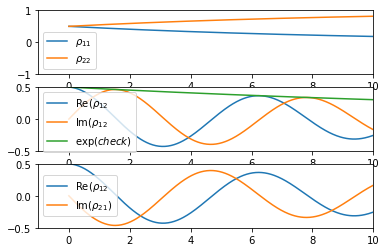

In [5]:
w = 1 
H = 0.5 * w * sigmaz()
gamma = 0.1 * wl
C_ops = [np.sqrt(gamma) * sigmam()]
result = mesolve(H, psi2, times, C_ops)
plt.figure()
plt.subplot(311)
plt.ylim(-1, 1)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(times,np.real(expect(result.states, projection(2,1,1))), label=r'$\rho_{22}$');
plt.legend()
plt.subplot(312)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
plt.plot(times,0.5*np.exp(-gamma/2*times), label=r'exp($check$)');
plt.legend() 
plt.subplot(313)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
plt.legend() 

In [10]:
def update_spin_up(up):     
   psi_up= up*basis(N,0)
   return(psi_up)

def update_spin_down(down,up):
   psi_up=update_spin_up(up)
   psi_total=down*basis(N,1)+psi_up 
   psi_total=psi_total.unit()
   print(psi_total) 
   gamma = 0.1 * wl
   C_ops = [np.sqrt(gamma) * sigmaz()]
   result = mesolve(H, psi_total, times, C_ops)
   plt.figure()
   plt.subplot(311)
   plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
   plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
   plt.legend()
   plt.subplot(312)
   plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
   plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
   plt.legend() 
   plt.subplot(313)
   plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
   plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
   plt.legend() 

interact(update_spin_down,down=(-1,1,0.01), up=(-1,1,0.01));    

interactive(children=(FloatSlider(value=0.0, description='down', max=1.0, min=-1.0, step=0.01), FloatSlider(va…

####  Thermal Decoherence with dephasing

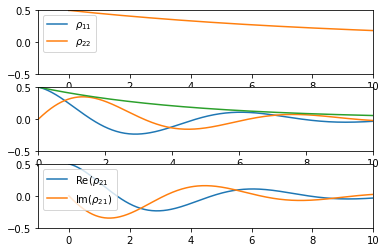

In [17]:
kb=1.38e-23
T=1000
wl = 1 
nther=1/(1-np.exp(wl/kb*T)) 
H = 0.5 * wl * sigmaz()
gamma = 0.1
gamma_plus = gamma*(1+nther)
gamma_minus = gamma*nther

C_ops = [np.sqrt(gamma_minus) * sigmam(),np.sqrt(gamma) * sigmaz(),np.sqrt(gamma_plus) * sigmap()]
result = mesolve(H,psi2 , times, C_ops)

plt.figure()
plt.subplot(311)

plt.xlim(tmin-1, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
plt.legend()
plt.subplot(312)

plt.xlim(tmin, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
plt.plot(times,0.5*np.exp(-2.2*(gamma_plus+gamma_minus)*times), label=r'exp($check$)');
#plt.legend() 
plt.subplot(313)

plt.xlim(tmin-1, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{21}$');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
plt.legend() 

### Harmonic Oscillator

In [9]:
projection(2,1,0)


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]